In [ ]:
pip install -U keras-tuner

     |████████████████████████████████| 61kB 2.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=6b5996e8afc581017b57dfcff49c4f98a75521b5f2300b80606eeae5b07057ee
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=e18df2b1c6e18d79508836055b420d95d617858998e1084d9d9c2b6de6c021b6
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import boston_housing
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats.stats import pearsonr

In [ ]:
data = pd.read_csv("/content/drive/My Drive/TraIn/train.csv")
del data['Id']
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [ ]:
y = data.get('SalePrice')
x = data.drop('SalePrice', axis=1)

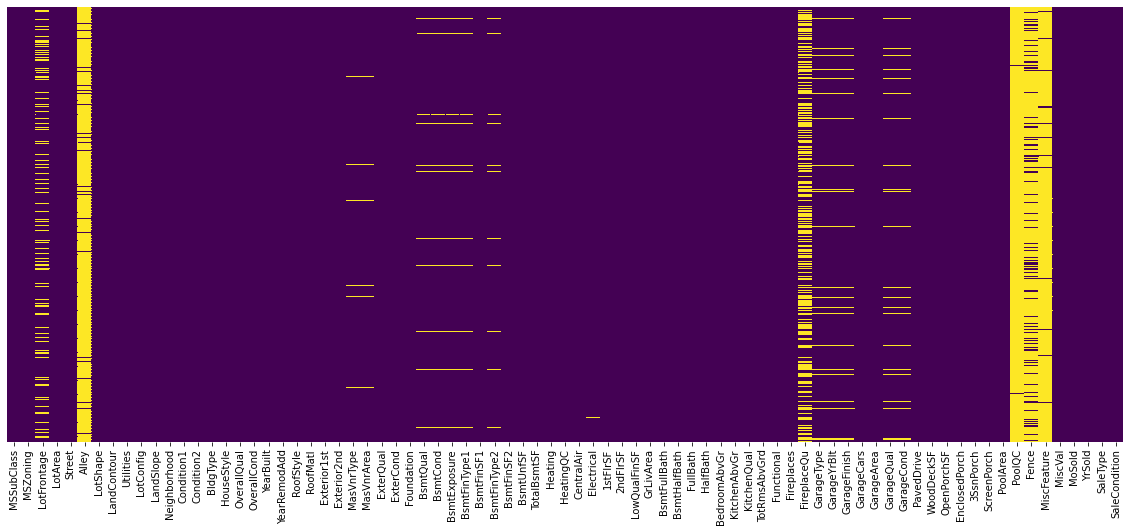

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
x.drop(labels=["Alley","PoolQC","Fence","MiscFeature"], axis=1, inplace=True)

In [ ]:
x[x.columns] = SimpleImputer(strategy="most_frequent").fit_transform(x[x.columns])
df = pd.DataFrame(x)
x = df.apply(preprocessing.LabelEncoder().fit_transform)
 
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,36,327,1,3,3,0,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,128,2,4,2,2,3,3,2,361,5,0,73,179,1,0,1,4,134,232,0,531,1,0,2,1,3,1,2,6,6,0,2,1,89,1,2,220,4,4,2,0,49,0,0,0,0,0,1,2,8,4
1,0,3,51,498,1,3,3,0,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,2,0,3,4,1,2,3,1,0,482,5,0,167,441,1,0,1,4,427,0,0,259,0,1,2,0,3,1,3,4,6,1,4,1,62,1,2,149,4,4,2,187,0,0,0,0,0,0,4,1,8,4
2,5,3,39,702,1,0,3,0,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,104,2,4,2,2,3,2,2,222,5,0,278,214,1,0,1,4,178,239,0,570,1,0,2,1,3,1,2,4,6,1,4,1,87,1,2,260,4,4,2,0,30,0,0,0,0,0,8,2,8,4
3,6,3,31,489,1,0,3,0,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,2,0,3,4,0,3,1,3,0,66,5,0,346,117,1,2,1,4,208,180,0,536,1,0,1,0,3,1,2,5,6,1,2,5,84,2,3,284,4,4,2,0,24,108,0,0,0,0,1,0,8,0
4,5,3,55,925,1,0,3,0,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,221,2,4,2,2,3,0,2,328,5,0,318,370,1,0,1,4,347,320,0,734,1,0,2,1,4,1,2,7,6,1,4,1,86,1,3,380,4,4,2,118,70,0,0,0,0,0,11,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,267,1,3,3,0,4,0,8,2,2,0,5,5,4,100,50,1,1,12,13,2,0,3,4,2,2,3,3,5,0,5,0,570,238,1,0,1,4,201,143,0,489,0,0,2,1,3,1,3,5,6,1,4,1,85,1,2,149,4,4,2,0,28,0,0,0,0,0,7,1,8,4
1456,0,3,56,866,1,3,3,0,4,0,14,2,2,0,2,5,5,79,38,1,1,9,10,3,72,3,4,1,2,3,3,0,407,4,29,376,577,1,4,1,4,723,0,0,694,1,0,2,0,3,1,3,5,2,2,4,1,64,2,2,182,4,4,2,214,0,0,0,0,0,0,1,4,8,4
1457,6,3,37,415,1,3,3,0,4,0,6,2,2,0,5,6,8,44,56,1,1,5,5,2,0,0,2,4,3,1,3,2,95,5,0,536,375,1,0,1,4,378,354,0,767,0,0,2,0,4,1,2,7,6,2,2,1,29,1,1,24,4,4,2,0,48,0,0,0,0,17,4,4,8,4
1458,0,3,39,505,1,3,3,0,4,0,12,2,2,0,2,4,5,51,46,3,1,8,8,2,0,3,4,1,3,3,2,2,14,4,134,0,325,1,2,1,0,296,0,0,147,1,0,1,0,2,1,2,3,6,0,2,1,36,2,1,19,4,4,2,224,0,38,0,0,0,0,3,4,8,4


In [ ]:
# функция нормализуем данные для работы
def normalize_data(data):
  mean = data.mean(axis=0)
  std = data.std(axis=0)
  data -= mean
  data /= std
  return data

  
x_norm = normalize_data(x)
x_norm

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.200281,-0.045516,-0.154108,-0.549026,0.064216,0.750473,0.314559,-0.026171,0.604463,-0.225639,-1.205801,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,1.075290,0.878367,-0.491347,-0.125754,0.742838,0.751369,-1.241024,0.784162,-0.777709,0.364083,0.835313,-0.324041,0.280952,0.628696,-0.429771,0.780188,0.307210,-0.305057,-1.106830,-0.617087,-0.123004,-0.884355,0.263722,0.302300,-0.944656,1.212165,-0.114562,0.621770,1.107431,-0.240978,0.789470,1.227165,0.165354,-0.211381,-0.409229,0.913976,0.255890,-0.950901,-0.429882,-0.686541,0.939768,-0.281790,0.311618,0.443729,0.215572,0.185955,0.289646,-0.748781,0.279022,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,-1.598563,0.138730,0.31376,0.208431
1,-1.001078,-0.045516,0.632964,0.019611,0.064216,0.750473,0.314559,-0.026171,-0.628101,-0.225639,1.953633,-1.187667,-0.031729,-0.41155,-0.543271,-0.071812,2.178881,0.139491,-0.429430,-0.491347,-0.125754,-0.508077,-0.660833,0.386914,-0.647116,0.663224,0.364083,-0.548974,-0.324041,0.280952,-1.128044,-1.518177,1.378954,0.307210,-0.305057,-0.692339,0.703255,-0.123004,-0.884355,0.263722,0.302300,0.473539,-0.700323,-0.114562,-0.534735,-0.819684,3.947457,0.789470,-0.761360,0.165354,-0.211381,0.795356,-0.318731,0.255890,0.600289,1.791811,-0.686541,-0.173215,-0.281790,0.311618,-0.166310,0.215572,0.185955,0.289646,1.845208,-0.744106,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,-0.488943,-0.614228,0.31376,0.208431
2,0.200281,-0.045516,0.003306,0.697984,0.064216,-1.378460,0.314559,-0.026171,0.604463,-0.225639,-1.205801,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,1.005972,0.829930,-0.491347,-0.125754,0.742838,0.751369,-1.241024,0.515798,-0.777709,0.364083,0.835313,-0.324041,0.280952,-0.249674,-0.429771,0.092350,0.307210,-0.305057,-0.202887,-0.440705,-0.123004,-0.884355,0.263722,0.302300,-0.731684,1.269869,-0.114562,0.787593,1.107431,-0.240978,0.789470,1.227165,0.165354,-0.211381,-0.409229,-0.318731,0.255890,0.600289,1.791811,-0.686541,0.857324,-0.281790,0.311618,0.787413,0.215572,0.185955,0.289646,-0.748781,-0.117701,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,0.990552,0.138730,0.31376,0.208431
3,0.440553,-0.045516,-0.416465,-0.010318,0.064216,-1.378460,0.314559,-0.026171,-1.860664,-0.225639,-1.039515,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,-1.870743,-0.720051,-0.491347,-0.125754,1.055567,1.316250,0.386914,-0.647116,0.663224,0.364083,-1.933261,0.832683,-2.791627,0.628696,-1.518177,-0.679612,0.307210,-0.305057,0.096957,-0.929534,-0.123004,0.265385,0.263722,0.302300,-0.586477,0.783504,-0.114562,0.643030,1.107431,-0.240978,-1.025689,-0.761360,0.165354,-0.211381,-0.409229,0.297623,0.255890,0.600289,-0.429882,1.586361,0.733660,0.949987,1.649742,0.993623,0.215572,0.185955,0.289646,-0.748781,-0.242982,4.282540,-0.114478,-0.254941,-0.06203,-0.161962,-1.598563,-1.367186,0.31376,-3.425110
4,0.200281,-0.045516,0.842850,1.439539,0.064216,-1.378460,0.314559,-0.026171,-0.628101,-0.225639,0.457059,-0.036277,-0.031729,-0.41155,1.026338,1.374324,-0.517023,0.971313,0.733056,-0.491347,-0.125754,0.742838,0.751369,-1.241024,1.824075,-0.777709,0.364083,0.835313,-0.324041,0.280952,-2.006414,-0.429771,0.616888,0.307210,-0.305057,-0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3, random_state = 2)

In [ ]:
model = Sequential()
model.add(Dense(5059, activation="relu", input_shape=(x_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(1264, activation="relu"))
model.add(Dense(632, activation="relu"))
model.add(Dense(158, activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5059)              384484    
_________________________________________________________________
dropout (Dropout)            (None, 5059)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1264)              6395840   
_________________________________________________________________
dense_2 (Dense)              (None, 632)               799480    
_________________________________________________________________
dense_3 (Dense)              (None, 158)               100014    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 159       
Total params: 7,679,977
Trainable params: 7,679,977
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(x_train, y_train, epochs=150, batch_size=500, verbose=1, validation_split=0.3)
print(history)
history = history.history
print("[DEBUG-USER] nn finish")

Epoch 1/150
2/2 [==============================] - 1s 296ms/step - loss: 38889099264.0000 - mae: 180046.1875 - val_loss: 37633236992.0000 - val_mae: 178798.5000
Epoch 2/150
2/2 [==============================] - 0s 186ms/step - loss: 38881439744.0000 - mae: 180025.9062 - val_loss: 37614395392.0000 - val_mae: 178749.0625
Epoch 3/150
2/2 [==============================] - 0s 190ms/step - loss: 38858752000.0000 - mae: 179966.7188 - val_loss: 37567143936.0000 - val_mae: 178631.0000
Epoch 4/150
2/2 [==============================] - 0s 192ms/step - loss: 38800592896.0000 - mae: 179825.7500 - val_loss: 37468098560.0000 - val_mae: 178392.8281
Epoch 5/150
2/2 [==============================] - 0s 198ms/step - loss: 38684479488.0000 - mae: 179548.8281 - val_loss: 37280387072.0000 - val_mae: 177955.4688
Epoch 6/150
2/2 [==============================] - 0s 186ms/step - loss: 38460387328.0000 - mae: 179035.8594 - val_loss: 36948836352.0000 - val_mae: 177199.9062
Epoch 7/150
2/2 [=================

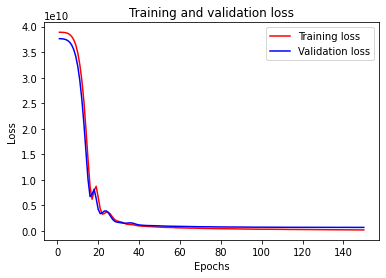

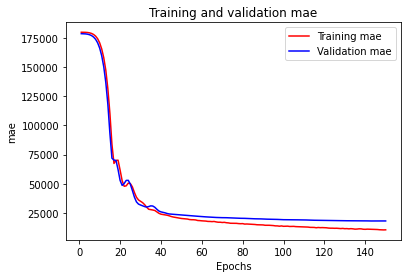

In [ ]:
def graphs(history):
    loss = history["loss"]
    val_loss = history["val_loss"]
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
 
    plt.clf()
 
    mae = history['mae']
    val_mae = history['val_mae']
    plt.plot(epochs, mae, 'r', label='Training mae')
    plt.plot(epochs, val_mae, 'b', label='Validation mae')
    plt.title('Training and validation mae')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()
 
 
 
# рисуем все графики
graphs(history)

In [ ]:
pred = model.predict(x_test)
predicted_x = np.reshape(pred, (pred.shape[0]))
predicted_y = np.reshape(y_test, (y_test.shape[0]))

In [ ]:
for test_index in range(30):
  print("Predict:", predicted_x[test_index],", True:",predicted_y.values[test_index])

Predict: 259446.9 , True: 289000
Predict: 151334.84 , True: 178000
Predict: 248587.28 , True: 359100
Predict: 212908.84 , True: 197000
Predict: 217954.28 , True: 224000
Predict: 191617.42 , True: 221000
Predict: 215109.48 , True: 227000
Predict: 161346.55 , True: 201000
Predict: 124782.33 , True: 84500
Predict: 394634.34 , True: 315000
Predict: 230047.38 , True: 215000
Predict: 200506.58 , True: 207000
Predict: 123779.86 , True: 118000
Predict: 177222.77 , True: 147000
Predict: 95650.39 , True: 105000
Predict: 182077.39 , True: 225000
Predict: 283401.75 , True: 287000
Predict: 290646.44 , True: 284000
Predict: 277776.16 , True: 240000
Predict: 294074.25 , True: 285000
Predict: 369305.12 , True: 310000
Predict: 170964.39 , True: 172500
Predict: 147032.88 , True: 174000
Predict: 243463.5 , True: 222000
Predict: 429051.78 , True: 438780
Predict: 231764.56 , True: 260400
Predict: 146778.95 , True: 110000
Predict: 277000.94 , True: 262280
Predict: 207196.2 , True: 204000
Predict: 431582.2 ,

In [ ]:
cc = np.corrcoef(predicted_x, predicted_y)
ccc = cc[0][1]
print(f'Correlation Coefficient: {ccc}')

Correlation Coefficient: 0.86692280021276


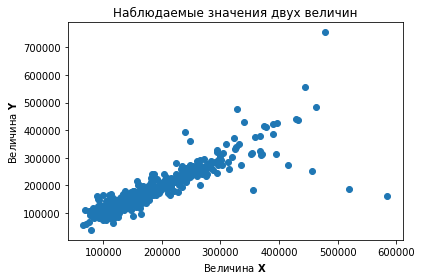

In [ ]:
fig, ax = plt.subplots()

ax.scatter(predicted_x, predicted_y)

ax.set_xlabel(r'Величина $\mathbf{X}$')
ax.set_ylabel(r'Величина $\mathbf{Y}$')

ax.set_title('Наблюдаемые значения двух величин')

plt.show()

<Figure size 432x288 with 0 Axes>

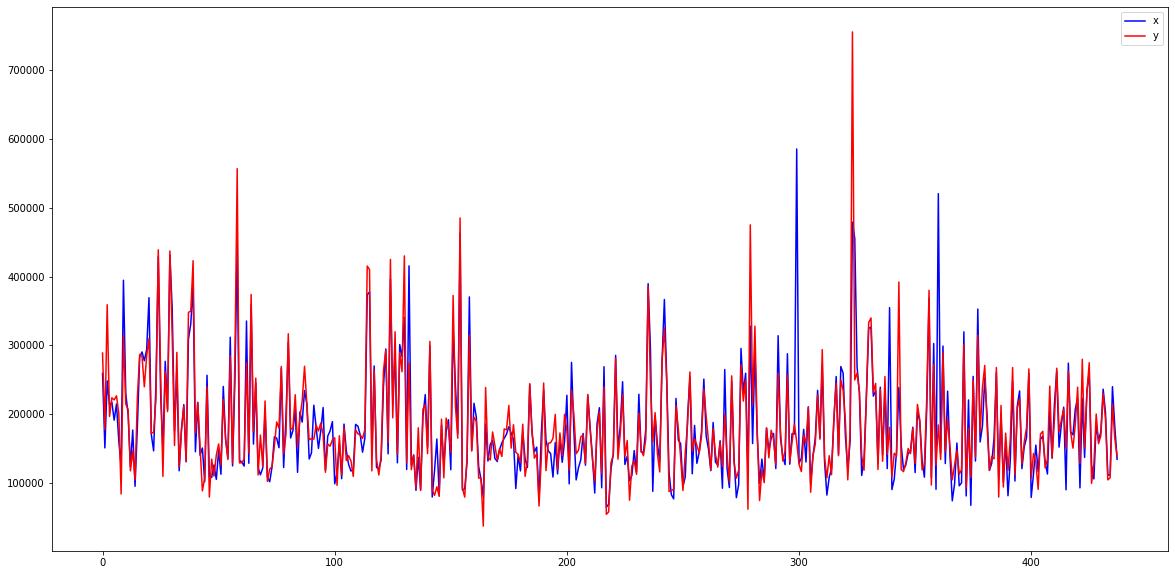

In [ ]:
plt.clf()
plt.figure(figsize=(20,10))
plt.plot(range(0, len(predicted_y)), predicted_x, 'b', label='x')
plt.plot(range(0, len(predicted_y)), predicted_y, 'r', label='y')
plt.legend()
plt.show()

+KERAS

In [ ]:
def build_model(hp):
  hidden_layers = hp.Choice('hidden_layers', values=[1,2,3])
  activation_choice = hp.Choice('activation', values=['relu', 'selu', 'elu'])
  model = Sequential()
  model.add(Dense(units=hp.Int('units',min_value=256,max_value=5059,step=768),activation=activation_choice, input_shape=(x_train.shape[1], )))
  model.add(Dropout(0.3))
  for i in range(hidden_layers):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',min_value=237//(i+1), max_value=1264//(i+1),step=316//(i+1)),activation=activation_choice))
  model.add(Dense(1))  
  model.compile(optimizer='rmsprop', loss="mse", metrics=["mae"])
  return model

In [ ]:
! rm -rf untitled_project/

In [ ]:
def find_best_NN(x_train, y_train):
  # создаю тюнер, который сможет подобрать оптимальную архитектуру модели
  tuner = RandomSearch(build_model, objective="val_mae", max_trials=40, executions_per_trial=1,)
  print("\n\n\n")
  # начинается автоматический подбор гиперпараметров
  print('[INFO] start searching')
  tuner.search(x_train, y_train, batch_size=500, epochs=150, validation_split=0.3)
  # выбираем лучшую модель
  print("\n\n\nRESULTS SUMMARY")
  tuner.results_summary()
  print("\n\n\n")
  # получаем лучшую модель
  print("\n\n\nHERE IS THE BEST MODEL\n\n\n")
  best_params = tuner.get_best_hyperparameters()[0]
  best_model = tuner.hypermodel.build(best_params)
  best_model.summary()
  return best_model

best_model = find_best_NN(x_train, y_train)





[INFO] start searching
Epoch 1/150
2/2 [==============================] - 0s 137ms/step - loss: 38889213952.0000 - mae: 180047.4375 - val_loss: 37635923968.0000 - val_mae: 178810.6250
Epoch 2/150
2/2 [==============================] - 0s 30ms/step - loss: 38885728256.0000 - mae: 180043.0938 - val_loss: 37632307200.0000 - val_mae: 178806.2031
Epoch 3/150
2/2 [==============================] - 0s 29ms/step - loss: 38881091584.0000 - mae: 180036.6719 - val_loss: 37626499072.0000 - val_mae: 178796.2188
Epoch 4/150
2/2 [==============================] - 0s 31ms/step - loss: 38874415104.0000 - mae: 180024.8594 - val_loss: 37618843648.0000 - val_mae: 178781.5000
Epoch 5/150
2/2 [==============================] - 0s 31ms/step - loss: 38865657856.0000 - mae: 180008.0938 - val_loss: 37609500672.0000 - val_mae: 178764.6875
Epoch 6/150
2/2 [==============================] - 0s 32ms/step - loss: 38855077888.0000 - mae: 179989.0312 - val_loss: 37598789632.0000 - val_mae: 178743.9531
Epoch 7/150


Epoch 1/150
2/2 [==============================] - 0s 173ms/step - loss: 38888165376.0000 - mae: 180043.7188 - val_loss: 37622534144.0000 - val_mae: 178771.3125
Epoch 2/150
2/2 [==============================] - 0s 98ms/step - loss: 38865477632.0000 - mae: 179987.7656 - val_loss: 37568630784.0000 - val_mae: 178648.3281
Epoch 3/150
2/2 [==============================] - 0s 90ms/step - loss: 38798995456.0000 - mae: 179839.1094 - val_loss: 37458477056.0000 - val_mae: 178411.5469
Epoch 4/150
2/2 [==============================] - 0s 86ms/step - loss: 38669443072.0000 - mae: 179563.5469 - val_loss: 37280260096.0000 - val_mae: 178035.1719
Epoch 5/150
2/2 [==============================] - 0s 85ms/step - loss: 38461456384.0000 - mae: 179129.1562 - val_loss: 37019058176.0000 - val_mae: 177490.5469
Epoch 6/150
2/2 [==============================] - 0s 87ms/step - loss: 38154973184.0000 - mae: 178502.8438 - val_loss: 36658188288.0000 - val_mae: 176741.1406
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 169ms/step - loss: 38888849408.0000 - mae: 180046.7031 - val_loss: 37631827968.0000 - val_mae: 178803.2969
Epoch 2/150
2/2 [==============================] - 0s 75ms/step - loss: 38878740480.0000 - mae: 180028.7344 - val_loss: 37603868672.0000 - val_mae: 178748.6719
Epoch 3/150
2/2 [==============================] - 0s 79ms/step - loss: 38842535936.0000 - mae: 179960.3281 - val_loss: 37537103872.0000 - val_mae: 178623.7344
Epoch 4/150
2/2 [==============================] - 0s 73ms/step - loss: 38760468480.0000 - mae: 179808.8438 - val_loss: 37419827200.0000 - val_mae: 178405.4375
Epoch 5/150
2/2 [==============================] - 0s 76ms/step - loss: 38622334976.0000 - mae: 179555.7656 - val_loss: 37249933312.0000 - val_mae: 178088.4375
Epoch 6/150
2/2 [==============================] - 0s 73ms/step - loss: 38426615808.0000 - mae: 179194.7344 - val_loss: 37025841152.0000 - val_mae: 177668.4688
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 218ms/step - loss: 38888689664.0000 - mae: 180046.5625 - val_loss: 37616005120.0000 - val_mae: 178771.9062
Epoch 2/150
2/2 [==============================] - 0s 135ms/step - loss: 38845222912.0000 - mae: 179967.2031 - val_loss: 37426683904.0000 - val_mae: 178416.4219
Epoch 3/150
2/2 [==============================] - 0s 129ms/step - loss: 38564048896.0000 - mae: 179448.4531 - val_loss: 36735307776.0000 - val_mae: 177108.7188
Epoch 4/150
2/2 [==============================] - 0s 141ms/step - loss: 37709778944.0000 - mae: 177810.3281 - val_loss: 35276693504.0000 - val_mae: 174262.8594
Epoch 5/150
2/2 [==============================] - 0s 122ms/step - loss: 35913379840.0000 - mae: 174335.5000 - val_loss: 32689565696.0000 - val_mae: 168968.7500
Epoch 6/150
2/2 [==============================] - 0s 124ms/step - loss: 32896382976.0000 - mae: 168202.0000 - val_loss: 29056331776.0000 - val_mae: 160903.5469
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 245ms/step - loss: 38888534016.0000 - mae: 180047.4688 - val_loss: 37628628992.0000 - val_mae: 178804.8281
Epoch 2/150
2/2 [==============================] - 0s 210ms/step - loss: 38873206784.0000 - mae: 180026.2969 - val_loss: 37596368896.0000 - val_mae: 178748.4062
Epoch 3/150
2/2 [==============================] - 1s 262ms/step - loss: 38833590272.0000 - mae: 179955.2188 - val_loss: 37543452672.0000 - val_mae: 178657.9375
Epoch 4/150
2/2 [==============================] - 1s 272ms/step - loss: 38769537024.0000 - mae: 179845.6406 - val_loss: 37464428544.0000 - val_mae: 178496.3906
Epoch 5/150
2/2 [==============================] - 1s 260ms/step - loss: 38680977408.0000 - mae: 179673.0625 - val_loss: 37369184256.0000 - val_mae: 178320.5312
Epoch 6/150
2/2 [==============================] - 1s 254ms/step - loss: 38570577920.0000 - mae: 179469.8438 - val_loss: 37257887744.0000 - val_mae: 178115.0781
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 228ms/step - loss: 38887698432.0000 - mae: 180042.1406 - val_loss: 37622538240.0000 - val_mae: 178771.4062
Epoch 2/150
2/2 [==============================] - 0s 137ms/step - loss: 38867935232.0000 - mae: 179993.3281 - val_loss: 37590990848.0000 - val_mae: 178700.4688
Epoch 3/150
2/2 [==============================] - 0s 142ms/step - loss: 38831349760.0000 - mae: 179912.3281 - val_loss: 37543501824.0000 - val_mae: 178597.7188
Epoch 4/150
2/2 [==============================] - 0s 139ms/step - loss: 38776635392.0000 - mae: 179795.5156 - val_loss: 37478830080.0000 - val_mae: 178460.5156
Epoch 5/150
2/2 [==============================] - 0s 149ms/step - loss: 38703947776.0000 - mae: 179641.6406 - val_loss: 37399044096.0000 - val_mae: 178292.2344
Epoch 6/150
2/2 [==============================] - 0s 151ms/step - loss: 38613934080.0000 - mae: 179454.0000 - val_loss: 37303476224.0000 - val_mae: 178090.7812
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 176ms/step - loss: 38888914944.0000 - mae: 180045.6875 - val_loss: 37629173760.0000 - val_mae: 178788.4531
Epoch 2/150
2/2 [==============================] - 0s 95ms/step - loss: 38875426816.0000 - mae: 180012.1406 - val_loss: 37596491776.0000 - val_mae: 178712.7656
Epoch 3/150
2/2 [==============================] - 0s 91ms/step - loss: 38834450432.0000 - mae: 179919.7031 - val_loss: 37525499904.0000 - val_mae: 178558.0000
Epoch 4/150
2/2 [==============================] - 0s 84ms/step - loss: 38750363648.0000 - mae: 179738.7812 - val_loss: 37406838784.0000 - val_mae: 178304.8125
Epoch 5/150
2/2 [==============================] - 0s 87ms/step - loss: 38614052864.0000 - mae: 179447.6094 - val_loss: 37234663424.0000 - val_mae: 177941.2031
Epoch 6/150
2/2 [==============================] - 0s 85ms/step - loss: 38413488128.0000 - mae: 179032.5312 - val_loss: 36992315392.0000 - val_mae: 177433.7656
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 167ms/step - loss: 38888865792.0000 - mae: 180046.5000 - val_loss: 37626912768.0000 - val_mae: 178793.6250
Epoch 2/150
2/2 [==============================] - 0s 72ms/step - loss: 38866255872.0000 - mae: 180005.1250 - val_loss: 37528182784.0000 - val_mae: 178604.9844
Epoch 3/150
2/2 [==============================] - 0s 73ms/step - loss: 38716551168.0000 - mae: 179731.1094 - val_loss: 37163978752.0000 - val_mae: 177918.4375
Epoch 4/150
2/2 [==============================] - 0s 80ms/step - loss: 38253957120.0000 - mae: 178857.5781 - val_loss: 36356567040.0000 - val_mae: 176384.3438
Epoch 5/150
2/2 [==============================] - 0s 72ms/step - loss: 37303402496.0000 - mae: 177065.6875 - val_loss: 35000774656.0000 - val_mae: 173750.7188
Epoch 6/150
2/2 [==============================] - 0s 77ms/step - loss: 35642933248.0000 - mae: 173869.9375 - val_loss: 32761978880.0000 - val_mae: 169223.6094
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 143ms/step - loss: 38889324544.0000 - mae: 180047.9062 - val_loss: 37635395584.0000 - val_mae: 178811.1719
Epoch 2/150
2/2 [==============================] - 0s 56ms/step - loss: 38884220928.0000 - mae: 180042.0938 - val_loss: 37626236928.0000 - val_mae: 178796.8750
Epoch 3/150
2/2 [==============================] - 0s 58ms/step - loss: 38872539136.0000 - mae: 180022.2812 - val_loss: 37609418752.0000 - val_mae: 178765.1562
Epoch 4/150
2/2 [==============================] - 0s 64ms/step - loss: 38852669440.0000 - mae: 179985.7812 - val_loss: 37586657280.0000 - val_mae: 178720.9375
Epoch 5/150
2/2 [==============================] - 0s 58ms/step - loss: 38826999808.0000 - mae: 179937.5000 - val_loss: 37558415360.0000 - val_mae: 178669.4531
Epoch 6/150
2/2 [==============================] - 0s 56ms/step - loss: 38795530240.0000 - mae: 179878.9062 - val_loss: 37528170496.0000 - val_mae: 178612.3125
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 210ms/step - loss: 38888988672.0000 - mae: 180047.0938 - val_loss: 37625253888.0000 - val_mae: 178789.4688
Epoch 2/150
2/2 [==============================] - 0s 108ms/step - loss: 38864879616.0000 - mae: 180001.3594 - val_loss: 37519372288.0000 - val_mae: 178587.6562
Epoch 3/150
2/2 [==============================] - 0s 112ms/step - loss: 38709612544.0000 - mae: 179713.2344 - val_loss: 37123805184.0000 - val_mae: 177839.0312
Epoch 4/150
2/2 [==============================] - 0s 109ms/step - loss: 38195941376.0000 - mae: 178752.2500 - val_loss: 36208959488.0000 - val_mae: 176083.2656
Epoch 5/150
2/2 [==============================] - 0s 109ms/step - loss: 37111631872.0000 - mae: 176669.4688 - val_loss: 34677776384.0000 - val_mae: 173051.0625
Epoch 6/150
2/2 [==============================] - 0s 108ms/step - loss: 35279351808.0000 - mae: 173083.1406 - val_loss: 32324612096.0000 - val_mae: 168164.6250
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 237ms/step - loss: 38887723008.0000 - mae: 180044.3125 - val_loss: 37627674624.0000 - val_mae: 178770.7812
Epoch 2/150
2/2 [==============================] - 0s 151ms/step - loss: 38867337216.0000 - mae: 179991.1094 - val_loss: 37541634048.0000 - val_mae: 178619.6250
Epoch 3/150
2/2 [==============================] - 0s 148ms/step - loss: 38735945728.0000 - mae: 179746.7812 - val_loss: 37130661888.0000 - val_mae: 177818.7969
Epoch 4/150
2/2 [==============================] - 0s 148ms/step - loss: 38168186880.0000 - mae: 178639.9844 - val_loss: 35803553792.0000 - val_mae: 175245.7969
Epoch 5/150
2/2 [==============================] - 0s 169ms/step - loss: 36459343872.0000 - mae: 175367.9844 - val_loss: 32925904896.0000 - val_mae: 169401.4531
Epoch 6/150
2/2 [==============================] - 0s 183ms/step - loss: 33001408512.0000 - mae: 168215.9688 - val_loss: 28380123136.0000 - val_mae: 159201.8281
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 237ms/step - loss: 38887960576.0000 - mae: 180043.0938 - val_loss: 37608013824.0000 - val_mae: 178734.0469
Epoch 2/150
2/2 [==============================] - 0s 127ms/step - loss: 38834716672.0000 - mae: 179913.5625 - val_loss: 37396279296.0000 - val_mae: 178244.6094
Epoch 3/150
2/2 [==============================] - 0s 126ms/step - loss: 38541242368.0000 - mae: 179259.2188 - val_loss: 36716056576.0000 - val_mae: 176754.0469
Epoch 4/150
2/2 [==============================] - 0s 128ms/step - loss: 37703008256.0000 - mae: 177426.6250 - val_loss: 35272683520.0000 - val_mae: 173618.1406
Epoch 5/150
2/2 [==============================] - 0s 123ms/step - loss: 35968745472.0000 - mae: 173672.7188 - val_loss: 32736221184.0000 - val_mae: 167982.3125
Epoch 6/150
2/2 [==============================] - 0s 136ms/step - loss: 33072615424.0000 - mae: 167133.9219 - val_loss: 29100163072.0000 - val_mae: 159427.0312
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 155ms/step - loss: 38888919040.0000 - mae: 180045.5938 - val_loss: 37630558208.0000 - val_mae: 178791.4219
Epoch 2/150
2/2 [==============================] - 0s 48ms/step - loss: 38877609984.0000 - mae: 180015.6875 - val_loss: 37602734080.0000 - val_mae: 178722.2500
Epoch 3/150
2/2 [==============================] - 0s 46ms/step - loss: 38842580992.0000 - mae: 179931.7969 - val_loss: 37540884480.0000 - val_mae: 178578.9375
Epoch 4/150
2/2 [==============================] - 0s 46ms/step - loss: 38769623040.0000 - mae: 179765.1250 - val_loss: 37434400768.0000 - val_mae: 178342.0781
Epoch 5/150
2/2 [==============================] - 0s 51ms/step - loss: 38643806208.0000 - mae: 179490.2344 - val_loss: 37269688320.0000 - val_mae: 177984.3438
Epoch 6/150
2/2 [==============================] - 0s 45ms/step - loss: 38455398400.0000 - mae: 179085.9375 - val_loss: 37040119808.0000 - val_mae: 177491.5156
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 108ms/step - loss: 38889435136.0000 - mae: 180047.1250 - val_loss: 37637427200.0000 - val_mae: 178810.0781
Epoch 2/150
2/2 [==============================] - 0s 21ms/step - loss: 38887960576.0000 - mae: 180043.2188 - val_loss: 37636022272.0000 - val_mae: 178806.4375
Epoch 3/150
2/2 [==============================] - 0s 19ms/step - loss: 38886436864.0000 - mae: 180039.3906 - val_loss: 37634347008.0000 - val_mae: 178802.3594
Epoch 4/150
2/2 [==============================] - 0s 21ms/step - loss: 38884679680.0000 - mae: 180035.1094 - val_loss: 37632565248.0000 - val_mae: 178798.0469
Epoch 5/150
2/2 [==============================] - 0s 23ms/step - loss: 38882701312.0000 - mae: 180030.4844 - val_loss: 37630525440.0000 - val_mae: 178793.2969
Epoch 6/150
2/2 [==============================] - 0s 20ms/step - loss: 38880460800.0000 - mae: 180025.2812 - val_loss: 37628260352.0000 - val_mae: 178788.1406
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 157ms/step - loss: 38888161280.0000 - mae: 180043.9062 - val_loss: 37628276736.0000 - val_mae: 178787.1562
Epoch 2/150
2/2 [==============================] - 0s 74ms/step - loss: 38876090368.0000 - mae: 180014.6562 - val_loss: 37610336256.0000 - val_mae: 178747.7969
Epoch 3/150
2/2 [==============================] - 0s 70ms/step - loss: 38855016448.0000 - mae: 179969.3281 - val_loss: 37582712832.0000 - val_mae: 178690.3906
Epoch 4/150
2/2 [==============================] - 0s 69ms/step - loss: 38823739392.0000 - mae: 179905.2344 - val_loss: 37547249664.0000 - val_mae: 178617.2969
Epoch 5/150
2/2 [==============================] - 0s 67ms/step - loss: 38783782912.0000 - mae: 179823.0000 - val_loss: 37503934464.0000 - val_mae: 178528.5938
Epoch 6/150
2/2 [==============================] - 0s 70ms/step - loss: 38734663680.0000 - mae: 179724.3438 - val_loss: 37452648448.0000 - val_mae: 178423.7812
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 156ms/step - loss: 38889086976.0000 - mae: 180047.0312 - val_loss: 37631455232.0000 - val_mae: 178801.1719
Epoch 2/150
2/2 [==============================] - 0s 62ms/step - loss: 38878072832.0000 - mae: 180026.8125 - val_loss: 37590302720.0000 - val_mae: 178721.6875
Epoch 3/150
2/2 [==============================] - 0s 64ms/step - loss: 38819491840.0000 - mae: 179914.6719 - val_loss: 37450047488.0000 - val_mae: 178453.3438
Epoch 4/150
2/2 [==============================] - 0s 65ms/step - loss: 38642991104.0000 - mae: 179582.8125 - val_loss: 37144293376.0000 - val_mae: 177865.6719
Epoch 5/150
2/2 [==============================] - 0s 61ms/step - loss: 38259134464.0000 - mae: 178863.0156 - val_loss: 36574855168.0000 - val_mae: 176760.7031
Epoch 6/150
2/2 [==============================] - 0s 59ms/step - loss: 37587816448.0000 - mae: 177561.1250 - val_loss: 35711258624.0000 - val_mae: 175050.9531
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 120ms/step - loss: 38888730624.0000 - mae: 180046.7188 - val_loss: 37633429504.0000 - val_mae: 178807.1562
Epoch 2/150
2/2 [==============================] - 0s 39ms/step - loss: 38882111488.0000 - mae: 180036.9844 - val_loss: 37623463936.0000 - val_mae: 178788.9062
Epoch 3/150
2/2 [==============================] - 0s 32ms/step - loss: 38869569536.0000 - mae: 180013.2031 - val_loss: 37603577856.0000 - val_mae: 178750.6250
Epoch 4/150
2/2 [==============================] - 0s 33ms/step - loss: 38845038592.0000 - mae: 179966.5938 - val_loss: 37567856640.0000 - val_mae: 178680.6719
Epoch 5/150
2/2 [==============================] - 0s 33ms/step - loss: 38803124224.0000 - mae: 179886.1406 - val_loss: 37514936320.0000 - val_mae: 178577.6406
Epoch 6/150
2/2 [==============================] - 0s 31ms/step - loss: 38743855104.0000 - mae: 179772.1094 - val_loss: 37448667136.0000 - val_mae: 178449.5312
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 240ms/step - loss: 38888873984.0000 - mae: 180047.3750 - val_loss: 37620899840.0000 - val_mae: 178783.8906
Epoch 2/150
2/2 [==============================] - 0s 139ms/step - loss: 38856273920.0000 - mae: 179989.6406 - val_loss: 37506220032.0000 - val_mae: 178567.5625
Epoch 3/150
2/2 [==============================] - 0s 140ms/step - loss: 38702686208.0000 - mae: 179708.1250 - val_loss: 37211660288.0000 - val_mae: 178016.5469
Epoch 4/150
2/2 [==============================] - 0s 130ms/step - loss: 38356656128.0000 - mae: 179058.4688 - val_loss: 36723122176.0000 - val_mae: 177093.4688
Epoch 5/150
2/2 [==============================] - 0s 138ms/step - loss: 37773295616.0000 - mae: 177952.5156 - val_loss: 35971911680.0000 - val_mae: 175650.2188
Epoch 6/150
2/2 [==============================] - 0s 142ms/step - loss: 36902547456.0000 - mae: 176314.6094 - val_loss: 34964606976.0000 - val_mae: 173674.3594
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 201ms/step - loss: 38888509440.0000 - mae: 180046.6406 - val_loss: 37621780480.0000 - val_mae: 178787.2500
Epoch 2/150
2/2 [==============================] - 0s 111ms/step - loss: 38859169792.0000 - mae: 179994.6250 - val_loss: 37520416768.0000 - val_mae: 178594.3906
Epoch 3/150
2/2 [==============================] - 0s 111ms/step - loss: 38719836160.0000 - mae: 179735.5781 - val_loss: 37251104768.0000 - val_mae: 178088.0312
Epoch 4/150
2/2 [==============================] - 0s 113ms/step - loss: 38398423040.0000 - mae: 179130.4062 - val_loss: 36790472704.0000 - val_mae: 177211.7344
Epoch 5/150
2/2 [==============================] - 0s 111ms/step - loss: 37838360576.0000 - mae: 178087.0625 - val_loss: 36070174720.0000 - val_mae: 175822.2969
Epoch 6/150
2/2 [==============================] - 0s 111ms/step - loss: 37029793792.0000 - mae: 176518.3125 - val_loss: 35182653440.0000 - val_mae: 174069.0625
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 231ms/step - loss: 38887292928.0000 - mae: 180041.2969 - val_loss: 37595930624.0000 - val_mae: 178702.3906
Epoch 2/150
2/2 [==============================] - 0s 142ms/step - loss: 38815252480.0000 - mae: 179860.9219 - val_loss: 37305769984.0000 - val_mae: 178024.8906
Epoch 3/150
2/2 [==============================] - 0s 140ms/step - loss: 38417203200.0000 - mae: 178955.3750 - val_loss: 36391395328.0000 - val_mae: 176004.5781
Epoch 4/150
2/2 [==============================] - 0s 137ms/step - loss: 37263081472.0000 - mae: 176454.0156 - val_loss: 34428907520.0000 - val_mae: 171694.6562
Epoch 5/150
2/2 [==============================] - 0s 152ms/step - loss: 34910851072.0000 - mae: 171306.7344 - val_loss: 31103070208.0000 - val_mae: 164131.2500
Epoch 6/150
2/2 [==============================] - 0s 162ms/step - loss: 31037943808.0000 - mae: 162411.5312 - val_loss: 26317645824.0000 - val_mae: 152365.0625
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 172ms/step - loss: 38887936000.0000 - mae: 180043.1719 - val_loss: 37604229120.0000 - val_mae: 178723.8906
Epoch 2/150
2/2 [==============================] - 0s 83ms/step - loss: 38824857600.0000 - mae: 179883.7656 - val_loss: 37299716096.0000 - val_mae: 178005.9062
Epoch 3/150
2/2 [==============================] - 0s 88ms/step - loss: 38399868928.0000 - mae: 178906.9375 - val_loss: 36213239808.0000 - val_mae: 175570.3906
Epoch 4/150
2/2 [==============================] - 0s 82ms/step - loss: 37018365952.0000 - mae: 175833.0938 - val_loss: 33670537216.0000 - val_mae: 169878.4688
Epoch 5/150
2/2 [==============================] - 0s 86ms/step - loss: 33946427392.0000 - mae: 168939.2500 - val_loss: 29130786816.0000 - val_mae: 159207.6562
Epoch 6/150
2/2 [==============================] - 0s 87ms/step - loss: 28650100736.0000 - mae: 156415.6406 - val_loss: 22650939392.0000 - val_mae: 142076.1719
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 1s 269ms/step - loss: 38886227968.0000 - mae: 180038.7969 - val_loss: 37594873856.0000 - val_mae: 178701.3125
Epoch 2/150
2/2 [==============================] - 0s 184ms/step - loss: 38821253120.0000 - mae: 179878.7188 - val_loss: 37404971008.0000 - val_mae: 178270.3594
Epoch 3/150
2/2 [==============================] - 0s 206ms/step - loss: 38579740672.0000 - mae: 179342.3906 - val_loss: 36967432192.0000 - val_mae: 177326.3594
Epoch 4/150
2/2 [==============================] - 0s 205ms/step - loss: 38041018368.0000 - mae: 178205.7344 - val_loss: 36193148928.0000 - val_mae: 175684.1875
Epoch 5/150
2/2 [==============================] - 0s 207ms/step - loss: 37157294080.0000 - mae: 176324.7188 - val_loss: 35113451520.0000 - val_mae: 173369.9219
Epoch 6/150
2/2 [==============================] - 0s 190ms/step - loss: 35931566080.0000 - mae: 173699.9844 - val_loss: 33692798976.0000 - val_mae: 170266.9219
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 131ms/step - loss: 38888701952.0000 - mae: 180046.5625 - val_loss: 37630361600.0000 - val_mae: 178799.8281
Epoch 2/150
2/2 [==============================] - 0s 39ms/step - loss: 38877081600.0000 - mae: 180025.5625 - val_loss: 37604966400.0000 - val_mae: 178747.6250
Epoch 3/150
2/2 [==============================] - 0s 37ms/step - loss: 38844137472.0000 - mae: 179958.1250 - val_loss: 37540356096.0000 - val_mae: 178620.6719
Epoch 4/150
2/2 [==============================] - 0s 37ms/step - loss: 38761914368.0000 - mae: 179798.9688 - val_loss: 37393485824.0000 - val_mae: 178330.7812
Epoch 5/150
2/2 [==============================] - 0s 41ms/step - loss: 38583447552.0000 - mae: 179450.6094 - val_loss: 37120737280.0000 - val_mae: 177802.2812
Epoch 6/150
2/2 [==============================] - 0s 37ms/step - loss: 38255685632.0000 - mae: 178826.9844 - val_loss: 36668342272.0000 - val_mae: 176920.5469
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 1s 261ms/step - loss: 38888542208.0000 - mae: 180046.6562 - val_loss: 37617299456.0000 - val_mae: 178773.7812
Epoch 2/150
2/2 [==============================] - 0s 175ms/step - loss: 38847401984.0000 - mae: 179968.3750 - val_loss: 37411733504.0000 - val_mae: 178376.8594
Epoch 3/150
2/2 [==============================] - 0s 176ms/step - loss: 38537826304.0000 - mae: 179383.5938 - val_loss: 36576149504.0000 - val_mae: 176731.3906
Epoch 4/150
2/2 [==============================] - 0s 177ms/step - loss: 37418475520.0000 - mae: 177235.6094 - val_loss: 34533351424.0000 - val_mae: 172533.9219
Epoch 5/150
2/2 [==============================] - 0s 176ms/step - loss: 35014283264.0000 - mae: 172195.8906 - val_loss: 31186784256.0000 - val_mae: 165132.1094
Epoch 6/150
2/2 [==============================] - 0s 183ms/step - loss: 31053481984.0000 - mae: 163384.6250 - val_loss: 26250018816.0000 - val_mae: 152975.7969
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 147ms/step - loss: 38889127936.0000 - mae: 180047.4688 - val_loss: 37634895872.0000 - val_mae: 178811.4062
Epoch 2/150
2/2 [==============================] - 0s 67ms/step - loss: 38883340288.0000 - mae: 180041.3125 - val_loss: 37624868864.0000 - val_mae: 178794.9219
Epoch 3/150
2/2 [==============================] - 0s 61ms/step - loss: 38871040000.0000 - mae: 180020.1406 - val_loss: 37608161280.0000 - val_mae: 178762.6250
Epoch 4/150
2/2 [==============================] - 0s 58ms/step - loss: 38851768320.0000 - mae: 179983.5781 - val_loss: 37586247680.0000 - val_mae: 178719.9531
Epoch 5/150
2/2 [==============================] - 0s 56ms/step - loss: 38826553344.0000 - mae: 179935.9844 - val_loss: 37558796288.0000 - val_mae: 178669.6406
Epoch 6/150
2/2 [==============================] - 0s 57ms/step - loss: 38795939840.0000 - mae: 179879.1406 - val_loss: 37528670208.0000 - val_mae: 178612.7969
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 204ms/step - loss: 38888521728.0000 - mae: 180046.4062 - val_loss: 37614108672.0000 - val_mae: 178769.2344
Epoch 2/150
2/2 [==============================] - 0s 112ms/step - loss: 38839676928.0000 - mae: 179957.2656 - val_loss: 37364989952.0000 - val_mae: 178295.7031
Epoch 3/150
2/2 [==============================] - 0s 117ms/step - loss: 38467010560.0000 - mae: 179256.4219 - val_loss: 36363001856.0000 - val_mae: 176375.8750
Epoch 4/150
2/2 [==============================] - 0s 122ms/step - loss: 37139390464.0000 - mae: 176738.8125 - val_loss: 33937975296.0000 - val_mae: 171534.2969
Epoch 5/150
2/2 [==============================] - 0s 109ms/step - loss: 34257238016.0000 - mae: 170944.9844 - val_loss: 29904005120.0000 - val_mae: 162793.2969
Epoch 6/150
2/2 [==============================] - 0s 113ms/step - loss: 29518884864.0000 - mae: 160441.1250 - val_loss: 24323133440.0000 - val_mae: 148856.7656
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 182ms/step - loss: 38888783872.0000 - mae: 180047.2188 - val_loss: 37631668224.0000 - val_mae: 178808.5625
Epoch 2/150
2/2 [==============================] - 0s 94ms/step - loss: 38877855744.0000 - mae: 180034.4844 - val_loss: 37609652224.0000 - val_mae: 178769.3594
Epoch 3/150
2/2 [==============================] - 0s 97ms/step - loss: 38851768320.0000 - mae: 179986.9375 - val_loss: 37574881280.0000 - val_mae: 178703.0156
Epoch 4/150
2/2 [==============================] - 0s 95ms/step - loss: 38810558464.0000 - mae: 179911.2344 - val_loss: 37526724608.0000 - val_mae: 178615.3594
Epoch 5/150
2/2 [==============================] - 0s 94ms/step - loss: 38755684352.0000 - mae: 179810.9531 - val_loss: 37468348416.0000 - val_mae: 178504.7969
Epoch 6/150
2/2 [==============================] - 0s 93ms/step - loss: 38688854016.0000 - mae: 179687.4688 - val_loss: 37398405120.0000 - val_mae: 178374.0938
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 1s 255ms/step - loss: 38886604800.0000 - mae: 180040.2500 - val_loss: 37598142464.0000 - val_mae: 178711.5469
Epoch 2/150
2/2 [==============================] - 0s 164ms/step - loss: 38825762816.0000 - mae: 179892.8438 - val_loss: 37402636288.0000 - val_mae: 178280.8750
Epoch 3/150
2/2 [==============================] - 0s 187ms/step - loss: 38577139712.0000 - mae: 179354.9531 - val_loss: 36926021632.0000 - val_mae: 177281.4375
Epoch 4/150
2/2 [==============================] - 0s 175ms/step - loss: 37991706624.0000 - mae: 178147.1094 - val_loss: 36048949248.0000 - val_mae: 175467.5781
Epoch 5/150
2/2 [==============================] - 0s 168ms/step - loss: 36983226368.0000 - mae: 176076.6250 - val_loss: 34786234368.0000 - val_mae: 172818.2031
Epoch 6/150
2/2 [==============================] - 0s 204ms/step - loss: 35509796864.0000 - mae: 173001.5312 - val_loss: 33054715904.0000 - val_mae: 169099.6406
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 160ms/step - loss: 38888960000.0000 - mae: 180046.9531 - val_loss: 37630418944.0000 - val_mae: 178804.5781
Epoch 2/150
2/2 [==============================] - 0s 65ms/step - loss: 38873468928.0000 - mae: 180023.5938 - val_loss: 37580697600.0000 - val_mae: 178706.6875
Epoch 3/150
2/2 [==============================] - 0s 66ms/step - loss: 38808662016.0000 - mae: 179899.0312 - val_loss: 37460910080.0000 - val_mae: 178481.5469
Epoch 4/150
2/2 [==============================] - 0s 69ms/step - loss: 38663286784.0000 - mae: 179628.2344 - val_loss: 37249822720.0000 - val_mae: 178086.4219
Epoch 5/150
2/2 [==============================] - 0s 69ms/step - loss: 38418333696.0000 - mae: 179172.4688 - val_loss: 36942839808.0000 - val_mae: 177509.5938
Epoch 6/150
2/2 [==============================] - 0s 67ms/step - loss: 38041473024.0000 - mae: 178473.4688 - val_loss: 36478226432.0000 - val_mae: 176628.9844
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 196ms/step - loss: 38888878080.0000 - mae: 180047.1719 - val_loss: 37626068992.0000 - val_mae: 178793.1719
Epoch 2/150
2/2 [==============================] - 0s 106ms/step - loss: 38868029440.0000 - mae: 180010.5312 - val_loss: 37558652928.0000 - val_mae: 178664.9062
Epoch 3/150
2/2 [==============================] - 0s 107ms/step - loss: 38783430656.0000 - mae: 179848.9531 - val_loss: 37401047040.0000 - val_mae: 178368.9688
Epoch 4/150
2/2 [==============================] - 0s 106ms/step - loss: 38581927936.0000 - mae: 179480.9062 - val_loss: 37101445120.0000 - val_mae: 177804.4219
Epoch 5/150
2/2 [==============================] - 0s 106ms/step - loss: 38236934144.0000 - mae: 178826.3438 - val_loss: 36685815808.0000 - val_mae: 177008.0625
Epoch 6/150
2/2 [==============================] - 0s 108ms/step - loss: 37754982400.0000 - mae: 177911.5938 - val_loss: 36125884416.0000 - val_mae: 175924.0156
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 171ms/step - loss: 38889013248.0000 - mae: 180047.3438 - val_loss: 37629775872.0000 - val_mae: 178799.7188
Epoch 2/150
2/2 [==============================] - 0s 79ms/step - loss: 38872711168.0000 - mae: 180019.1719 - val_loss: 37580808192.0000 - val_mae: 178706.2344
Epoch 3/150
2/2 [==============================] - 0s 83ms/step - loss: 38810804224.0000 - mae: 179902.5938 - val_loss: 37467971584.0000 - val_mae: 178494.6719
Epoch 4/150
2/2 [==============================] - 0s 76ms/step - loss: 38669852672.0000 - mae: 179644.6406 - val_loss: 37261570048.0000 - val_mae: 178107.3906
Epoch 5/150
2/2 [==============================] - 0s 76ms/step - loss: 38430769152.0000 - mae: 179196.6562 - val_loss: 36968435712.0000 - val_mae: 177553.2969
Epoch 6/150
2/2 [==============================] - 0s 79ms/step - loss: 38086070272.0000 - mae: 178555.0938 - val_loss: 36564000768.0000 - val_mae: 176781.3750
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 209ms/step - loss: 38887661568.0000 - mae: 180043.9844 - val_loss: 37625221120.0000 - val_mae: 178774.9688
Epoch 2/150
2/2 [==============================] - 0s 106ms/step - loss: 38869819392.0000 - mae: 180002.6250 - val_loss: 37578219520.0000 - val_mae: 178694.4375
Epoch 3/150
2/2 [==============================] - 0s 117ms/step - loss: 38802284544.0000 - mae: 179875.9062 - val_loss: 37386682368.0000 - val_mae: 178320.6719
Epoch 4/150
2/2 [==============================] - 0s 110ms/step - loss: 38533500928.0000 - mae: 179362.2188 - val_loss: 36783349760.0000 - val_mae: 177158.0938
Epoch 5/150
2/2 [==============================] - 0s 124ms/step - loss: 37775486976.0000 - mae: 177898.5781 - val_loss: 35525492736.0000 - val_mae: 174685.9062
Epoch 6/150
2/2 [==============================] - 0s 110ms/step - loss: 36251344896.0000 - mae: 174921.2031 - val_loss: 33433972736.0000 - val_mae: 170410.8750
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 174ms/step - loss: 38888206336.0000 - mae: 180046.0469 - val_loss: 37621559296.0000 - val_mae: 178783.6250
Epoch 2/150
2/2 [==============================] - 0s 81ms/step - loss: 38863900672.0000 - mae: 180001.7969 - val_loss: 37567418368.0000 - val_mae: 178675.2344
Epoch 3/150
2/2 [==============================] - 0s 88ms/step - loss: 38793494528.0000 - mae: 179869.0312 - val_loss: 37426360320.0000 - val_mae: 178410.8906
Epoch 4/150
2/2 [==============================] - 0s 86ms/step - loss: 38612434944.0000 - mae: 179528.1719 - val_loss: 37142155264.0000 - val_mae: 177868.7500
Epoch 5/150
2/2 [==============================] - 0s 85ms/step - loss: 38279421952.0000 - mae: 178890.3438 - val_loss: 36715470848.0000 - val_mae: 177042.2500
Epoch 6/150
2/2 [==============================] - 0s 86ms/step - loss: 37800579072.0000 - mae: 177975.8750 - val_loss: 36160421888.0000 - val_mae: 175957.9219
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 160ms/step - loss: 38888771584.0000 - mae: 180047.0469 - val_loss: 37633630208.0000 - val_mae: 178810.8125
Epoch 2/150
2/2 [==============================] - 0s 71ms/step - loss: 38881443840.0000 - mae: 180039.3594 - val_loss: 37619580928.0000 - val_mae: 178785.2969
Epoch 3/150
2/2 [==============================] - 0s 71ms/step - loss: 38864199680.0000 - mae: 180007.2500 - val_loss: 37596639232.0000 - val_mae: 178745.3750
Epoch 4/150
2/2 [==============================] - 0s 72ms/step - loss: 38836752384.0000 - mae: 179958.7969 - val_loss: 37564895232.0000 - val_mae: 178686.3594
Epoch 5/150
2/2 [==============================] - 0s 73ms/step - loss: 38800084992.0000 - mae: 179891.4062 - val_loss: 37525925888.0000 - val_mae: 178612.4688
Epoch 6/150
2/2 [==============================] - 0s 77ms/step - loss: 38757076992.0000 - mae: 179810.7344 - val_loss: 37482885120.0000 - val_mae: 178530.4688
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 143ms/step - loss: 38889091072.0000 - mae: 180047.1094 - val_loss: 37632966656.0000 - val_mae: 178807.3594
Epoch 2/150
2/2 [==============================] - 0s 66ms/step - loss: 38879842304.0000 - mae: 180033.8750 - val_loss: 37603905536.0000 - val_mae: 178750.9219
Epoch 3/150
2/2 [==============================] - 0s 64ms/step - loss: 38840242176.0000 - mae: 179957.9375 - val_loss: 37527523328.0000 - val_mae: 178606.0625
Epoch 4/150
2/2 [==============================] - 0s 56ms/step - loss: 38747611136.0000 - mae: 179784.7656 - val_loss: 37393321984.0000 - val_mae: 178352.1719
Epoch 5/150
2/2 [==============================] - 0s 59ms/step - loss: 38589325312.0000 - mae: 179487.9375 - val_loss: 37190131712.0000 - val_mae: 177965.7969
Epoch 6/150
2/2 [==============================] - 0s 61ms/step - loss: 38355554304.0000 - mae: 179044.8281 - val_loss: 36916236288.0000 - val_mae: 177438.9531
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 145ms/step - loss: 38888693760.0000 - mae: 180045.2500 - val_loss: 37632036864.0000 - val_mae: 178796.5000
Epoch 2/150
2/2 [==============================] - 0s 59ms/step - loss: 38881071104.0000 - mae: 180026.3125 - val_loss: 37621854208.0000 - val_mae: 178773.8594
Epoch 3/150
2/2 [==============================] - 0s 56ms/step - loss: 38869233664.0000 - mae: 180000.7031 - val_loss: 37606551552.0000 - val_mae: 178741.9375
Epoch 4/150
2/2 [==============================] - 0s 56ms/step - loss: 38851751936.0000 - mae: 179964.6719 - val_loss: 37586591744.0000 - val_mae: 178701.0469
Epoch 5/150
2/2 [==============================] - 0s 55ms/step - loss: 38829133824.0000 - mae: 179918.4062 - val_loss: 37562576896.0000 - val_mae: 178652.2812
Epoch 6/150
2/2 [==============================] - 0s 61ms/step - loss: 38802313216.0000 - mae: 179864.0938 - val_loss: 37534560256.0000 - val_mae: 178595.3438
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 161ms/step - loss: 38888370176.0000 - mae: 180046.0156 - val_loss: 37625647104.0000 - val_mae: 178792.3281
Epoch 2/150
2/2 [==============================] - 0s 68ms/step - loss: 38870646784.0000 - mae: 180013.6094 - val_loss: 37591187456.0000 - val_mae: 178725.2188
Epoch 3/150
2/2 [==============================] - 0s 67ms/step - loss: 38823682048.0000 - mae: 179922.1094 - val_loss: 37498388480.0000 - val_mae: 178557.2031
Epoch 4/150
2/2 [==============================] - 0s 73ms/step - loss: 38708895744.0000 - mae: 179711.3438 - val_loss: 37310246912.0000 - val_mae: 178186.6250
Epoch 5/150
2/2 [==============================] - 0s 78ms/step - loss: 38474657792.0000 - mae: 179265.4375 - val_loss: 36985298944.0000 - val_mae: 177564.5156
Epoch 6/150
2/2 [==============================] - 0s 70ms/step - loss: 38108577792.0000 - mae: 178569.3594 - val_loss: 36565491712.0000 - val_mae: 176751.8281
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 1s 287ms/step - loss: 38886088704.0000 - mae: 180041.1562 - val_loss: 37606371328.0000 - val_mae: 178734.7031
Epoch 2/150
2/2 [==============================] - 0s 203ms/step - loss: 38842994688.0000 - mae: 179947.8750 - val_loss: 37513859072.0000 - val_mae: 178569.9219
Epoch 3/150
2/2 [==============================] - 0s 210ms/step - loss: 38712045568.0000 - mae: 179700.9531 - val_loss: 37200588800.0000 - val_mae: 177990.5469
Epoch 4/150
2/2 [==============================] - 0s 217ms/step - loss: 38300069888.0000 - mae: 178945.3594 - val_loss: 36456202240.0000 - val_mae: 176550.6875
Epoch 5/150
2/2 [==============================] - 0s 218ms/step - loss: 37391441920.0000 - mae: 177209.8594 - val_loss: 35208200192.0000 - val_mae: 174102.7656
Epoch 6/150
2/2 [==============================] - 0s 194ms/step - loss: 35918721024.0000 - mae: 174356.3125 - val_loss: 33470453760.0000 - val_mae: 170574.8125
Epoch 7/150
2/2 [=================

Epoch 1/150
2/2 [==============================] - 0s 136ms/step - loss: 38889119744.0000 - mae: 180046.2344 - val_loss: 37629657088.0000 - val_mae: 178789.5000
Epoch 2/150
2/2 [==============================] - 0s 46ms/step - loss: 38873817088.0000 - mae: 180006.4688 - val_loss: 37562081280.0000 - val_mae: 178624.4844
Epoch 3/150
2/2 [==============================] - 0s 58ms/step - loss: 38779674624.0000 - mae: 179783.5625 - val_loss: 37312491520.0000 - val_mae: 178051.5000
Epoch 4/150
2/2 [==============================] - 0s 43ms/step - loss: 38458466304.0000 - mae: 179060.3906 - val_loss: 36690759680.0000 - val_mae: 176669.1719
Epoch 5/150
2/2 [==============================] - 0s 44ms/step - loss: 37698998272.0000 - mae: 177396.7188 - val_loss: 35484028928.0000 - val_mae: 174003.3906
Epoch 6/150
2/2 [==============================] - 0s 44ms/step - loss: 36260544512.0000 - mae: 174241.7188 - val_loss: 33475809280.0000 - val_mae: 169510.5469
Epoch 7/150
2/2 [======================

Epoch 1/150
2/2 [==============================] - 0s 186ms/step - loss: 38887514112.0000 - mae: 180044.3281 - val_loss: 37621174272.0000 - val_mae: 178778.5469
Epoch 2/150
2/2 [==============================] - 0s 103ms/step - loss: 38864543744.0000 - mae: 179999.6719 - val_loss: 37574889472.0000 - val_mae: 178687.7344
Epoch 3/150
2/2 [==============================] - 0s 103ms/step - loss: 38802694144.0000 - mae: 179883.2969 - val_loss: 37448736768.0000 - val_mae: 178453.9375
Epoch 4/150
2/2 [==============================] - 0s 102ms/step - loss: 38644158464.0000 - mae: 179581.0312 - val_loss: 37200916480.0000 - val_mae: 177980.0312
Epoch 5/150
2/2 [==============================] - 0s 115ms/step - loss: 38343835648.0000 - mae: 179018.9375 - val_loss: 36804882432.0000 - val_mae: 177222.4062
Epoch 6/150
2/2 [==============================] - 0s 102ms/step - loss: 37885353984.0000 - mae: 178151.7500 - val_loss: 36274466816.0000 - val_mae: 176193.7188
Epoch 7/150
2/2 [=================

INFO:tensorflow:Oracle triggered exit



RESULTS SUMMARY









HERE IS THE BEST MODEL



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3328)              252928    
_________________________________________________________________
dropout (Dropout)            (None, 3328)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 869)               2892901   
_________________________________________________________________
dense_2 (Dense)              (None, 276)               240120    
_________________________________________________________________
dense_3 (Dense)              (None, 184)               50968     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 185       
Total params: 3,437,102
Trainable params: 3,437,102
Non-trainable params: 0
_____________

In [26]:
best_history = best_model.fit(x_train, y_train, epochs=150, batch_size=500, validation_split=0.3)
best_history = best_history.history

Epoch 1/150
2/2 [==============================] - 0s 206ms/step - loss: 38887825408.0000 - mae: 180042.6562 - val_loss: 37605089280.0000 - val_mae: 178725.7969
Epoch 2/150
2/2 [==============================] - 0s 99ms/step - loss: 38830718976.0000 - mae: 179899.9531 - val_loss: 37377912832.0000 - val_mae: 178193.6094
Epoch 3/150
2/2 [==============================] - 0s 102ms/step - loss: 38525452288.0000 - mae: 179199.5781 - val_loss: 36661710848.0000 - val_mae: 176600.3438
Epoch 4/150
2/2 [==============================] - 0s 99ms/step - loss: 37646561280.0000 - mae: 177235.3281 - val_loss: 35123081216.0000 - val_mae: 173203.0938
Epoch 5/150
2/2 [==============================] - 0s 111ms/step - loss: 35753828352.0000 - mae: 173129.8906 - val_loss: 32333101056.0000 - val_mae: 166928.6719
Epoch 6/150
2/2 [==============================] - 0s 99ms/step - loss: 32594499584.0000 - mae: 165928.7188 - val_loss: 28467951616.0000 - val_mae: 157664.2969
Epoch 7/150
2/2 [====================

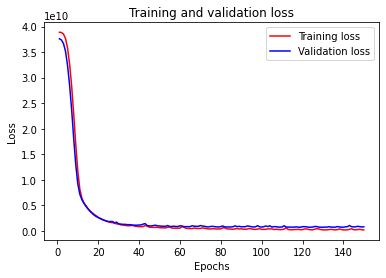

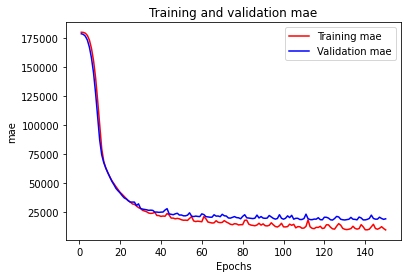

In [28]:
graphs(best_history)

In [30]:
kpredicted_x = best_model.predict(x_test)
kpredicted_x = np.reshape(kpredicted_x, (kpredicted_x.shape[0]))

In [38]:
for test_index in range(30):
  print("K:", kpredicted_x[test_index], " M:", predicted_x[test_index], " True:",predicted_y.values[test_index])

K: 254315.11  M: 259446.9  True: 289000
K: 149771.36  M: 151334.84  True: 178000
K: 241202.17  M: 248587.28  True: 359100
K: 202582.45  M: 212908.84  True: 197000
K: 204241.12  M: 217954.28  True: 224000
K: 184092.56  M: 191617.42  True: 221000
K: 207112.17  M: 215109.48  True: 227000
K: 158914.9  M: 161346.55  True: 201000
K: 129130.84  M: 124782.33  True: 84500
K: 381379.22  M: 394634.34  True: 315000
K: 218847.58  M: 230047.38  True: 215000
K: 189355.75  M: 200506.58  True: 207000
K: 123573.555  M: 123779.86  True: 118000
K: 171801.89  M: 177222.77  True: 147000
K: 97260.414  M: 95650.39  True: 105000
K: 185266.4  M: 182077.39  True: 225000
K: 271630.5  M: 283401.75  True: 287000
K: 285528.25  M: 290646.44  True: 284000
K: 265815.3  M: 277776.16  True: 240000
K: 283074.06  M: 294074.25  True: 285000
K: 354714.62  M: 369305.12  True: 310000
K: 168904.97  M: 170964.39  True: 172500
K: 148314.7  M: 147032.88  True: 174000
K: 231658.84  M: 243463.5  True: 222000
K: 422282.75  M: 429051.

In [34]:
KK = np.corrcoef(kpredicted_x, y_test)
KK = KK[0][1]
print(f'My model Correlation Coefficient: {ccc}')
print(f'Keras Correlation Coefficient: {KK}')

My model Correlation Coefficient: 0.86692280021276
Keras Correlation Coefficient: 0.8664898964220847


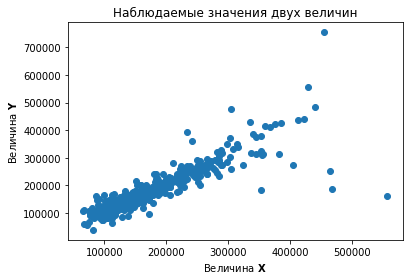

In [39]:
fig, ax = plt.subplots()

ax.scatter(kpredicted_x, predicted_y)

ax.set_xlabel(r'Величина $\mathbf{X}$')
ax.set_ylabel(r'Величина $\mathbf{Y}$')

ax.set_title('Наблюдаемые значения двух величин')

plt.show()